In [0]:
# Librerías de apoyo:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Creamos un modelo de árboles CRT:
from sklearn.tree import DecisionTreeRegressor
# Librerías con métricas:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [27]:
df = pd.read_csv('/content/drive/My Drive/Diners/BASE_PROSPECCION2.csv')
df.head()

,PERIODO,TIPDOC,NUMDOC,EDAD,IPNETO,LINEA_USD,NUM_TELEF,FLG_DEPENDIENTE,PRODUCTO,NIVELRIESGO,CANAL_ASIGNADO,DEPARTAMENTO,ZONA,PROSPECTO_PREMIUM,FLG_FORMALIZO,RECURRENCIA,NUM_TC,NUM_TC_ACTIVAS,NUM_TC_BENCH,NUM_TC_BENCH_ACT,NUM_TC_RETAIL,NUM_TC_RETAIL_ACT,NUM_TC_OTROS,NUM_TC_OTROS_ACT,SUM_LINEAS_RCC,SUM_LINEAS_BENCH,SUM_LINEAS_RETAIL,SUM_LINEAS_OTROS,SUM_SALDO_RCC,SUM_SALDO_BENCH,SUM_SALDO_RETAIL,SUM_SALDO_OTROS,MAX_LINEA_RCC,AVG_LINEA_RCC,MAX_SALDO_RCC,AVG_SALDO_RCC,MAX_ENTIDAD_RCC,USO_LINEA_RCC,USO_MAXLINEA_RCC,MAX_LINEA_BENCH,AVG_LINEA_BENCH,MAX_SALDO_BENCH,AVG_SALDO_BENCH,MAX_ENTIDAD_BENCH,USO_LINEA_BENCH,USO_MAXLINEA_BENCH,MAX_LINEA_RETAIL,AVG_LINEA_RETAIL,MAX_SALDO_RETAIL,AVG_SALDO_RETAIL,MAX_ENTIDAD_RETAIL,USO_LINEA_RETAIL,USO_MAXLINEA_RETAIL,MAX_LINEA_OTROS,AVG_LINEA_OTROS,MAX_SALDO_OTROS,AVG_SALDO_OTROS,MAX_ENTIDAD_OTROS,USO_LINEA_OTROS,USO_MAXLINEA_OTROS,SALDO_PLD,SALDO_VEHICULAR,SALDO_HIPOTECARIO,SALDO_TOTAL,CUOTA_CONSUMO,FACTOR_ENDEU_CONSUMO,CUOTA_TOTAL,FACTOR_ENDEU_TOTAL
0,201908,1,8127823,49,1582.1792,2500,1,1,1,2,1,1,1,0,0,2,2,1,1,0,1,1,0,0,11300.0,7400.0,3900.0,0.0,790.87,0.00,790.87,0.0,7400.0,807.14,0.00,56.49,2,0.07,0.00,7400.0,1850.0,0.00,0.00,2,0.00,0.00,3900.0,975.0,790.87,197.72,10,0.20,0.20,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,790.87,35.59,0.02,35.59,0.02
1,201908,1,8128955,49,2517.2550,6400,1,1,2,2,4,1,1,0,0,2,1,1,1,1,0,0,0,0,21000.0,21000.0,0.0,0.0,7454.75,7454.75,0.00,0.0,21000.0,1500.00,7454.75,532.48,1,0.35,0.35,21000.0,5250.0,7454.75,1863.69,1,0.35,0.35,0.0,0.0,0.00,0.00,10,0.00,0.00,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,7454.75,335.46,0.13,335.46,0.13
2,201908,1,8126161,50,2315.3083,3800,3,1,1,1,1,1,1,0,0,2,1,1,0,0,1,1,0,0,16100.0,0.0,16100.0,0.0,1368.95,0.00,1368.95,0.0,16100.0,1150.00,1368.95,97.78,10,0.09,0.09,0.0,0.0,0.00,0.00,0,0.00,0.00,16100.0,4025.0,1368.95,342.24,10,0.09,0.09,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,1368.95,61.60,0.03,61.60,0.03
3,201908,1,8127063,49,1874.7360,2600,1,1,1,2,-1,1,1,0,0,2,2,1,1,1,1,0,0,0,10400.0,7800.0,2600.0,0.0,111.33,111.33,0.00,0.0,7800.0,742.86,111.33,7.95,3,0.01,0.01,7800.0,1950.0,111.33,27.83,3,0.01,0.01,2600.0,650.0,0.00,0.00,14,0.00,0.00,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,111.33,5.01,0.00,5.01,0.00
4,201908,1,8127292,50,1846.7600,1700,1,1,1,2,-1,1,1,0,0,1,2,1,1,1,1,0,0,0,16600.0,16500.0,100.0,0.0,5771.64,5771.64,0.00,0.0,16500.0,1185.71,5771.64,412.26,3,0.35,0.35,16500.0,4125.0,5771.64,1442.91,3,0.35,0.35,100.0,25.0,0.00,0.00,7,0.00,0.00,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,5771.64,259.72,0.14,259.72,0.14


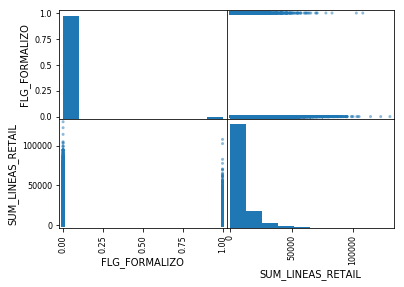

In [0]:
data = df[['FLG_FORMALIZO','SUM_LINEAS_RETAIL']]
scatter_matrix(data)
plt.show()


In [0]:
# Separamos X e Y's:
list_predictors = ['EDAD','IPNETO','LINEA_USD','NUM_TELEF','FLG_DEPENDIENTE','PRODUCTO','NIVELRIESGO'
                   ,'CANAL_ASIGNADO','DEPARTAMENTO','ZONA','PROSPECTO_PREMIUM','RECURRENCIA','NUM_TC','NUM_TC_ACTIVAS'
                  ,'NUM_TC_BENCH','NUM_TC_BENCH_ACT','NUM_TC_RETAIL','NUM_TC_RETAIL_ACT','NUM_TC_OTROS','NUM_TC_OTROS_ACT'
                  ,'SUM_LINEAS_RCC','SUM_LINEAS_BENCH','SUM_LINEAS_RETAIL','SUM_LINEAS_OTROS','SUM_SALDO_RCC'
                  ,'SUM_SALDO_BENCH','SUM_SALDO_RETAIL','SUM_SALDO_OTROS','MAX_LINEA_RCC','AVG_LINEA_RCC','MAX_SALDO_RCC'
                  ,'AVG_SALDO_RCC','MAX_ENTIDAD_RCC','USO_LINEA_RCC','USO_MAXLINEA_RCC','MAX_LINEA_BENCH','AVG_LINEA_BENCH'
                  ,'MAX_SALDO_BENCH','AVG_SALDO_BENCH','MAX_ENTIDAD_BENCH','USO_LINEA_BENCH','USO_MAXLINEA_BENCH','MAX_LINEA_RETAIL'
                  ,'AVG_LINEA_RETAIL','MAX_SALDO_RETAIL','AVG_SALDO_RETAIL','MAX_ENTIDAD_RETAIL','USO_LINEA_RETAIL','USO_MAXLINEA_RETAIL'
                  ,'MAX_LINEA_OTROS','AVG_LINEA_OTROS','MAX_SALDO_OTROS','AVG_SALDO_OTROS','MAX_ENTIDAD_OTROS','USO_LINEA_OTROS'
                  ,'USO_MAXLINEA_OTROS','SALDO_PLD','SALDO_VEHICULAR','SALDO_HIPOTECARIO','SALDO_TOTAL','CUOTA_CONSUMO'
                  ,'FACTOR_ENDEU_CONSUMO','CUOTA_TOTAL','FACTOR_ENDEU_TOTAL',]
list_target = ['FLG_FORMALIZO']

# División train-test!
X_train, X_test, Y_train, Y_test= train_test_split(
    df[list_predictors], # aquí se introduce el conjunto de variables predictoras
    df[list_target], # aquí se introduce el objetivo a predecir
    test_size = 0.2, # indicamos que queremos entrenar sobre el 80% de datos y evaluar sobre el 20% restante
    random_state = 1234
)

In [40]:
lista_profundidad = [12,14,16,18,20,22]
lista_nodo = [1700,1800,1900,2000,2100]
cantidad_maxima_variables = 'auto'
validation = []

for i in lista_profundidad:
  for j in lista_nodo:
    CRT = DecisionTreeRegressor(
      max_depth = i,
      min_samples_leaf = j,
      max_features = cantidad_maxima_variables,
      random_state = 1234 # establecemos una semilla aleatoria para reproducir resultados
    )
    CRT.fit(X_train,Y_train)
    y_predicted = CRT.predict(X_test)
    validation.append([i,j,r2_score(Y_test,y_predicted)])
  
data_final = pd.DataFrame(validation, columns = ['Profundidad' , 'nodos','r2_score'])
data_final

,Profundidad,nodos,r2_score
0,12,1700,0.045786
1,12,1800,0.045069
2,12,1900,0.044615
3,12,2000,0.045423
4,12,2100,0.045155
5,14,1700,0.045784
6,14,1800,0.045063
7,14,1900,0.044609
8,14,2000,0.045418
9,14,2100,0.045151
